# Replication: Isolated Capital Cities, Accountability, and Corruption: Evidence from US States by Filipe Campante and Quoc-Anh Do

### We import the package to create directories

In [71]:
import os
pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)


### We import the pandas package to use data

In [2]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### We import the main paper database.

In [3]:
df = pd.read_stata(pathout + 'CampanteDo_MainData.dta')
df['year'] = df.year.astype(int)
df

,state_code,year,GCISC1920,GCISC1930,GCISC1940,GCISC1950,GCISC1960,GCISC1970,GCISC1980,GCISC1990,...,ALDadjmean1970,ALDmean,ALDadjmean,centr_ALDmean1970,centr_SuitALD,ADmean1970,ADadjmean1970,centr_ALDmean,ALD_C1mean1970,ALDadj_C1mean1970
0,AL,1974,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
1,AL,1981,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
2,AL,1979,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
3,AL,1999,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
4,AL,1993,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,WY,2002,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1646,WY,1972,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1647,WY,1993,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1648,WY,1985,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062


In [4]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

### Figure 1

[Text(0, 0.5, 'Corruption'), Text(0.5, 0, 'Average log distance')]

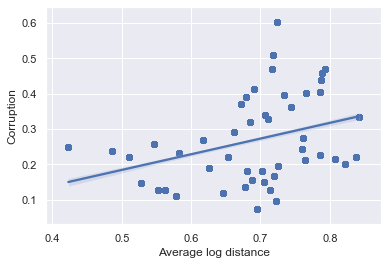

In [5]:
fig1 = sns.regplot(x='ALDmean1970', y='corruptrate_avg', data=df)
fig1.set(xlabel='Average log distance', ylabel='Corruption')

### Figure 2

In [6]:
# Importamos los paquetes usados para las regresiones
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Latex

In [49]:
df

,state_code,year,GCISC1920,GCISC1930,GCISC1940,GCISC1950,GCISC1960,GCISC1970,GCISC1980,GCISC1990,...,ALDadjmean1970,ALDmean,ALDadjmean,centr_ALDmean1970,centr_SuitALD,ADmean1970,ADadjmean1970,centr_ALDmean,ALD_C1mean1970,ALDadj_C1mean1970
0,AL,1974,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
1,AL,1981,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
2,AL,1979,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
3,AL,1999,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
4,AL,1993,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,WY,2002,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1646,WY,1972,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1647,WY,1993,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062
1648,WY,1985,0.194043,0.205192,0.208306,0.222118,0.228934,0.224595,0.212598,0.215788,...,0.826067,0.785944,0.828100,0.801944,0.798964,0.339461,0.469609,0.801944,0.757806,0.826062


In [50]:
# Creamos una nueva base de datos eliminando los missing values y tomando solo el año 1970
df1 = df.dropna(subset=['centr_ALDmean1970', 'logarea', 'logMaxDistSt'])
df_1970 = df1.loc[df1.year==1970].reset_index(drop=True)
df_1970

,state_code,year,GCISC1920,GCISC1930,GCISC1940,GCISC1950,GCISC1960,GCISC1970,GCISC1980,GCISC1990,...,ALDadjmean1970,ALDmean,ALDadjmean,centr_ALDmean1970,centr_SuitALD,ADmean1970,ADadjmean1970,centr_ALDmean,ALD_C1mean1970,ALDadj_C1mean1970
0,AL,1970,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
1,AZ,1970,0.274385,0.296211,0.301514,0.319634,0.334742,0.342203,0.343600,0.348584,...,0.804010,0.676184,0.789568,0.779610,0.805422,0.162461,0.426127,0.779610,0.658217,0.794787
2,AR,1970,0.301219,0.305551,0.307190,0.319683,0.338515,0.346436,0.347588,0.348523,...,0.826780,0.671455,0.816109,0.727836,0.751250,0.164494,0.540834,0.727836,0.655687,0.826739
3,CA,1970,0.189673,0.163304,0.158260,0.158688,0.150832,0.148764,0.148609,0.146814,...,0.838566,0.843011,0.843165,0.879118,0.859778,0.460454,0.461018,0.879118,0.715171,0.722471
4,CO,1970,0.435449,0.442573,0.452405,0.494398,0.511627,0.495940,0.443112,0.390527,...,0.588610,0.549628,0.612806,0.757997,0.823343,0.141484,0.282702,0.757997,0.514561,0.595235
5,CT,1970,0.484563,0.489454,0.489615,0.491016,0.491793,0.491016,0.488521,0.489053,...,0.782648,0.510959,0.783468,0.551155,0.578704,0.053226,0.550164,0.551155,0.544916,0.788230
6,DE,1970,0.454229,0.453020,0.451796,0.449428,0.457047,0.458080,0.461450,0.461643,...,0.907914,0.543742,0.904048,0.586059,0.557959,0.053156,0.772403,0.586059,0.506991,0.736093
7,FL,1970,0.198230,0.173137,0.162386,0.151833,0.134096,0.127555,0.125245,0.124409,...,0.873262,0.853232,0.884777,0.792728,0.801108,0.434152,0.551593,0.792728,0.736250,0.813077
8,GA,1970,0.302819,0.319811,0.317069,0.329027,0.343840,0.359219,0.358968,0.367962,...,0.750810,0.658148,0.736025,0.769103,0.761218,0.184771,0.376010,0.769103,0.650004,0.754450
9,ID,1970,0.215179,0.219993,0.229055,0.242720,0.250026,0.255225,0.265731,0.273602,...,0.808420,0.751074,0.794084,0.872004,0.866370,0.300669,0.432559,0.872004,0.737083,0.808420


In [51]:
mod0 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt', data=df_1970).fit(cov_type='HC1')
print(mod0.summary())
df_1970['pr_mod0'] = mod0.predict()
df_1970['red_mod0'] = mod0.resid


                            OLS Regression Results                            
Dep. Variable:      centr_ALDmean1970   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     136.2
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           8.13e-20
Time:                        18:41:05   Log-Likelihood:                 104.31
No. Observations:                  48   AIC:                            -202.6
Df Residuals:                      45   BIC:                            -197.0
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0157      0.048     -0.324   

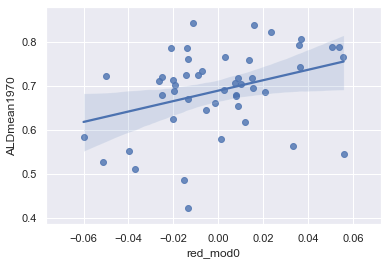

In [52]:
fig2 = sns.regplot(x='red_mod0', y='ALDmean1970', data=df_1970)

### C. Validation

The aim is to demonstrate that the proposed instruments are not correlated with predetermined variables (particularly geographical) that can generate changes between municipalities, in order to reinforce the assumption of exclusion.

For this, regressions are taken from individuals with respect to each predetermined variable, individually, and then regressions with all the variables.

The following 3 tables replicate exactly the data of table 1 of the paper, but the presentation varies. In this case, 3 tables are presented (one for each dependent variable).


In [53]:
from statsmodels.iolib.summary2 import summary_col

In [54]:
# Para centr_LADmean1970
mod11 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + logborder', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())            
mod13 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + lat', data=df_1970).fit(cov_type='HC1')
print(mod13.summary())
mod17 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + lon', data=df_1970).fit(cov_type='HC1')
print(mod17.summary())
mod14 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + logDCdistance', data=df_1970).fit(cov_type='HC1')
print(mod14.summary())
mod12 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + dateofstatehood', data=df_1970).fit(cov_type='HC1')
print(mod12.summary())
mod15 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + logelevation_span', data=df_1970).fit(cov_type='HC1')
print(mod15.summary())
mod18 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + waterpct', data=df_1970).fit(cov_type='HC1')
print(mod18.summary())
mod16 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + lognavwatways', data=df_1970).fit(cov_type='HC1')
print(mod16.summary())
mod11 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())
mod19 = smf.ols(formula='centr_ALDmean1970 ~ logarea + logMaxDistSt + lat + lon + logDCdistance + dateofstatehood + logelevation_span + waterpct + lognavwatways + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod19.summary())

                            OLS Regression Results                            
Dep. Variable:      centr_ALDmean1970   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     89.95
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           8.47e-19
Time:                        18:41:23   Log-Likelihood:                 104.55
No. Observations:                  48   AIC:                            -201.1
Df Residuals:                      44   BIC:                            -193.6
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0266      0.050     -0.535   

                            OLS Regression Results                            
Dep. Variable:      centr_ALDmean1970   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     43.30
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           2.24e-17
Time:                        18:41:23   Log-Likelihood:                 108.02
No. Observations:                  48   AIC:                            -194.0
Df Residuals:                      37   BIC:                            -173.5
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2148      0.28

#### Table 1—Correlations with Predetermined Variables (AvgLogDist - (population))

In [55]:
summary_col([mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18, mod19],stars=True,float_format='%0.2f',
                  model_names=['Share of arable (1950)','Date of statehood','Latitude','log distance to DC','log elevation span','log navigable waterways','Longitude','Percentage of water area', 'all'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

,Share of arable (1950),Date of statehood,Latitude,log distance to DC,log elevation span,log navigable waterways,Longitude,Percentage of water area,all
Intercept,-0.01,0.27,-0.03,-0.01,0.00,-0.03,-0.02,0.02,0.21
,(0.05),(0.21),(0.07),(0.05),(0.05),(0.05),(0.05),(0.06),(0.28)
R-squared,0.88,0.89,0.88,0.88,0.89,0.89,0.89,0.89,0.88
,0.89,0.90,0.89,0.89,0.89,0.89,0.89,0.89,0.91
arablesh1950,-0.00,,,,,,,,-0.02
,(0.02),,,,,,,,(0.02)
dateofstatehood,,-0.00,,,,,,,-0.00
,,(0.00),,,,,,,(0.00)
lat,,,0.00,,,,,,0.00
,,,(0.00),,,,,,(0.00)


In [56]:
# Para centr_SuitALD
mod11 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + logborder', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())            
mod13 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + lat', data=df_1970).fit(cov_type='HC1')
print(mod13.summary())
mod17 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + lon', data=df_1970).fit(cov_type='HC1')
print(mod17.summary())
mod14 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + logDCdistance', data=df_1970).fit(cov_type='HC1')
print(mod14.summary())
mod12 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + dateofstatehood', data=df_1970).fit(cov_type='HC1')
print(mod12.summary())
mod15 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + logelevation_span', data=df_1970).fit(cov_type='HC1')
print(mod15.summary())
mod18 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + waterpct', data=df_1970).fit(cov_type='HC1')
print(mod18.summary())
mod16 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + lognavwatways', data=df_1970).fit(cov_type='HC1')
print(mod16.summary())
mod11 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())
mod19 = smf.ols(formula='centr_SuitALD ~ logarea + logMaxDistSt + lat + lon + logDCdistance + dateofstatehood + logelevation_span + waterpct + lognavwatways + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod19.summary())

                            OLS Regression Results                            
Dep. Variable:          centr_SuitALD   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     298.3
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.01e-29
Time:                        18:42:48   Log-Likelihood:                 136.43
No. Observations:                  48   AIC:                            -264.9
Df Residuals:                      44   BIC:                            -257.4
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0167      0.030     -0.548   

#### Table 1—Correlations with Predetermined Variables (AvgLogDist - (suitability))

In [57]:
summary_col([mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18, mod19],stars=True,float_format='%0.2f',
                  model_names=['Share of arable (1950)','Date of statehood','Latitude','log distance to DC','log elevation span','log navigable waterways','Longitude','Percentage of water area', 'all'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

,Share of arable (1950),Date of statehood,Latitude,log distance to DC,log elevation span,log navigable waterways,Longitude,Percentage of water area,all
Intercept,-0.01,-0.07,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,0.09
,(0.03),(0.13),(0.04),(0.03),(0.03),(0.03),(0.03),(0.03),(0.18)
R-squared,0.97,0.97,0.96,0.96,0.96,0.97,0.97,0.97,0.96
,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97
arablesh1950,-0.01,,,,,,,,-0.01
,(0.01),,,,,,,,(0.02)
dateofstatehood,,0.00,,,,,,,-0.00
,,(0.00),,,,,,,(0.00)
lat,,,-0.00,,,,,,-0.00
,,,(0.00),,,,,,(0.00)


In [58]:
# Para ALDmean1970
mod11 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + logborder', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())            
mod13 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + lat', data=df_1970).fit(cov_type='HC1')
print(mod13.summary())
mod17 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + lon', data=df_1970).fit(cov_type='HC1')
print(mod17.summary())
mod14 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + logDCdistance', data=df_1970).fit(cov_type='HC1')
print(mod14.summary())
mod12 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + dateofstatehood', data=df_1970).fit(cov_type='HC1')
print(mod12.summary())
mod15 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + logelevation_span', data=df_1970).fit(cov_type='HC1')
print(mod15.summary())
mod18 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + waterpct', data=df_1970).fit(cov_type='HC1')
print(mod18.summary())
mod16 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + lognavwatways', data=df_1970).fit(cov_type='HC1')
print(mod16.summary())
mod11 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod11.summary())
mod19 = smf.ols(formula='ALDmean1970 ~ logarea + logMaxDistSt + lat + lon + logDCdistance + dateofstatehood + logelevation_span + waterpct + lognavwatways + arablesh1950', data=df_1970).fit(cov_type='HC1')
print(mod19.summary())

                            OLS Regression Results                            
Dep. Variable:            ALDmean1970   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     36.05
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           6.40e-12
Time:                        18:43:08   Log-Likelihood:                 67.603
No. Observations:                  48   AIC:                            -127.2
Df Residuals:                      44   BIC:                            -119.7
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0126      0.079      0.158   

#### Table 1—Correlations with Predetermined Variables (AvgLogDist)

In [59]:
summary_col([mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18, mod19],stars=True,float_format='%0.2f',
                  model_names=['Share of arable (1950)','Date of statehood','Latitude','log distance to DC','log elevation span','log navigable waterways','Longitude','Percentage of water area', 'all'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

,Share of arable (1950),Date of statehood,Latitude,log distance to DC,log elevation span,log navigable waterways,Longitude,Percentage of water area,all
Intercept,-0.04,0.65,0.07,-0.01,0.08,-0.07,-0.03,-0.02,0.31
,(0.07),(0.41),(0.11),(0.07),(0.08),(0.07),(0.08),(0.12),(0.59)
R-squared,0.58,0.59,0.58,0.58,0.63,0.61,0.58,0.57,0.58
,0.61,0.61,0.60,0.60,0.65,0.63,0.60,0.59,0.67
arablesh1950,0.05,,,,,,,,0.01
,(0.05),,,,,,,,(0.04)
dateofstatehood,,-0.00*,,,,,,,-0.00
,,(0.00),,,,,,,(0.00)
lat,,,-0.00,,,,,,0.00
,,,(0.00),,,,,,(0.00)


## Empiricial Analysis
### A Stylized Fact

We first look at the basic correlation patterns between our baseline measures of corruption and the isolation of capital cities 

Table 2

In [64]:
mod21 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDmean1970', data=df_1970).fit(cov_type='HC1')
print(mod21.summary())  
mod22 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDmean1970 + loginc + bacen + logpop', data=df_1970).fit(cov_type='HC1')
print(mod22.summary())  
mod23 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDmean1970 + loginc + bacen + logpop + govemp_sh + urbans + south + northeast + midwest', data=df_1970).fit(cov_type='HC1')
print(mod23.summary())  
mod24 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDmean1970 + loginc + bacen + logpop + govemp_sh + urbans + south + northeast + midwest + fract + regulation99 + miningshare2007', data=df_1970).fit(cov_type='HC1')
print(mod24.summary())  
mod25 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDadjmean1970', data=df_1970).fit(cov_type='HC1')
print(mod25.summary())  
mod26 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDadjmean1970 + loginc + bacen + logpop', data=df_1970).fit(cov_type='HC1')
print(mod26.summary())  
mod27 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDadjmean1970 + loginc + bacen + logpop + govemp_sh + urbans + south + northeast + midwest', data=df_1970).fit(cov_type='HC1')
print(mod27.summary())  
mod28 = smf.ols(formula='corruptrate_avg ~ logarea + logMaxDistSt + ALDadjmean1970 + loginc + bacen + logpop + govemp_sh + urbans + south + northeast + midwest + fract + regulation99 + miningshare2007', data=df_1970).fit(cov_type='HC1')
print(mod28.summary())  

                            OLS Regression Results                            
Dep. Variable:        corruptrate_avg   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     7.997
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           0.000231
Time:                        19:17:49   Log-Likelihood:                 39.368
No. Observations:                  48   AIC:                            -70.74
Df Residuals:                      44   BIC:                            -63.25
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2678      0.106      2.538   

                            OLS Regression Results                            
Dep. Variable:        corruptrate_avg   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     4.359
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           0.000373
Time:                        19:17:49   Log-Likelihood:                 50.311
No. Observations:                  48   AIC:                            -76.62
Df Residuals:                      36   BIC:                            -54.17
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8394      2.229      0.

The following table corresponds to table 2 of the paper. You can see that the data is replicated by comparing the first two rows.

#### Table 2—Corruption and Isolation of the Capital City: Avg log Distance

In [65]:
summary_col([mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28],stars=True,float_format='%0.2f',
                  model_names=['(1)','(2)','(3)','(4)','(5)','(6)','(7)','(8)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

,(1),(2),(3),(4),(5),(6),(7),(8)
ALDadjmean1970,,,,,0.90***,0.99***,0.88***,0.67***
,,,,,(0.19),(0.21),(0.27),(0.23)
ALDmean1970,1.05***,1.17***,1.03***,0.79***,,,,
,(0.21),(0.25),(0.32),(0.28),,,,
Intercept,0.27**,3.92***,2.58,1.76,-0.46**,3.05***,1.84,1.17
,(0.11),(1.17),(2.37),(1.91),(0.18),(1.16),(2.23),(1.83)
R-squared,0.21,0.39,0.39,0.44,0.20,0.38,0.39,0.44
,0.26,0.46,0.53,0.61,0.25,0.46,0.53,0.61
bacen,,1.22,-0.16,-0.90,,1.13,-0.32,-1.02
,,(0.84),(1.38),(1.10),,(0.84),(1.33),(1.05)


Now consider the robustness of results, beyond the different specifications in Table 2. They first consider alternative measures of corruption, in Table 3. The next step is to check for alternative measures of the isolation of the capital city.

In [66]:
df_2000 = df1.loc[df1.year==2000].reset_index(drop=True)
df_2000

,state_code,year,GCISC1920,GCISC1930,GCISC1940,GCISC1950,GCISC1960,GCISC1970,GCISC1980,GCISC1990,...,ALDadjmean1970,ALDmean,ALDadjmean,centr_ALDmean1970,centr_SuitALD,ADmean1970,ADadjmean1970,centr_ALDmean,ALD_C1mean1970,ALDadj_C1mean1970
0,AL,2000,0.271113,0.269330,0.268909,0.266121,0.264094,0.260586,0.260702,0.260425,...,0.858476,0.735365,0.860884,0.755758,0.741598,0.193620,0.515413,0.755758,0.656223,0.782453
1,AZ,2000,0.274385,0.296211,0.301514,0.319634,0.334742,0.342203,0.343600,0.348584,...,0.804010,0.676184,0.789568,0.779610,0.805422,0.162461,0.426127,0.779610,0.658217,0.794787
2,AR,2000,0.301219,0.305551,0.307190,0.319683,0.338515,0.346436,0.347588,0.348523,...,0.826780,0.671455,0.816109,0.727836,0.751250,0.164494,0.540834,0.727836,0.655687,0.826739
3,CA,2000,0.189673,0.163304,0.158260,0.158688,0.150832,0.148764,0.148609,0.146814,...,0.838566,0.843011,0.843165,0.879118,0.859778,0.460454,0.461018,0.879118,0.715171,0.722471
4,CO,2000,0.435449,0.442573,0.452405,0.494398,0.511627,0.495940,0.443112,0.390527,...,0.588610,0.549628,0.612806,0.757997,0.823343,0.141484,0.282702,0.757997,0.514561,0.595235
5,CT,2000,0.484563,0.489454,0.489615,0.491016,0.491793,0.491016,0.488521,0.489053,...,0.782648,0.510959,0.783468,0.551155,0.578704,0.053226,0.550164,0.551155,0.544916,0.788230
6,DE,2000,0.454229,0.453020,0.451796,0.449428,0.457047,0.458080,0.461450,0.461643,...,0.907914,0.543742,0.904048,0.586059,0.557959,0.053156,0.772403,0.586059,0.506991,0.736093
7,FL,2000,0.198230,0.173137,0.162386,0.151833,0.134096,0.127555,0.125245,0.124409,...,0.873262,0.853232,0.884777,0.792728,0.801108,0.434152,0.551593,0.792728,0.736250,0.813077
8,GA,2000,0.302819,0.319811,0.317069,0.329027,0.343840,0.359219,0.358968,0.367962,...,0.750810,0.658148,0.736025,0.769103,0.761218,0.184771,0.376010,0.769103,0.650004,0.754450
9,ID,2000,0.215179,0.219993,0.229055,0.242720,0.250026,0.255225,0.265731,0.273602,...,0.808420,0.751074,0.794084,0.872004,0.866370,0.300669,0.432559,0.872004,0.737083,0.808420


In [69]:
# La variable corruptrate2_stateoff8611 no se encuentra en la base de datos.
# mod31 = smf.ols(formula='corruptrate2_stateoff8611 ~ logarea + logMaxDistSt + ALDmean1970 + loginc + bacen2000 + logpop + govemp_sh + south + northeast + midwest', data=df_1970).fit(cov_type='HC1')
# print(mod31.summary())  
# mod32 = smf.ols(formula='corruptrate2_stateoff8611 ~ ALDadjmean1970 + loginc + bacen2000 + logpop + govemp_sh + south + northeast + midwest', data=df_1970).fit(cov_type='HC1')
# print(mod32.summary())  
mod33 = smf.ols(formula='corruptratestate_exalead ~ ALDmean +  loginc +  bacen2000 +logpop+ logarea+ logMaxDistSt+ govemp_sh +south+ northeast+ midwest', data=df_2000).fit(cov_type='HC1')
print(mod33.summary())  
mod34 = smf.ols(formula='corruptratestate_exalead ~ ALDadjmean1970 + loginc + bacen2000 + logpop + govemp_sh + south + northeast + midwest', data=df_2000).fit(cov_type='HC1')
print(mod34.summary())  
mod35 = smf.ols(formula='corruptrate_avg ~ ADmean1970+ loginc+ bacen+ logpop+ logarea+ logMaxDistSt+ govemp_sh+ urbans+ south+ northeast+ midwest', data=df_1970).fit(cov_type='HC1')
print(mod35.summary())  
mod36 = smf.ols(formula='corruptrate_avg ~ ADadjmean1970 +loginc +bacen +logpop+ govemp_sh+ urbans +south +northeast +midwest', data=df_1970).fit(cov_type='HC1')
print(mod36.summary())  
mod37 = smf.ols(formula='corruptratestate_exalead ~ popcap2010_sh +loginc+ bacen2000 +logpop+ govemp_sh+ south+ northeast+ midwest', data=df_2000).fit(cov_type='HC1')
print(mod37.summary())  
mod38 = smf.ols(formula='corruptratestate_exalead ~ capital_largest +loginc+ bacen2000+ logpop+ govemp_sh+ south+ northeast+ midwest', data=df_2000).fit(cov_type='HC1')
print(mod38.summary())  

                               OLS Regression Results                               
Dep. Variable:     corruptratestate_exalead   R-squared:                       0.395
Model:                                  OLS   Adj. R-squared:                  0.232
Method:                       Least Squares   F-statistic:                     1.448
Date:                      Fri, 26 Jun 2020   Prob (F-statistic):              0.198
Time:                              20:09:42   Log-Likelihood:                 328.66
No. Observations:                        48   AIC:                            -635.3
Df Residuals:                            37   BIC:                            -614.7
Df Model:                                10                                         
Covariance Type:                        HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

The following table corresponds to table 3 of the paper. The first two estimates could not be replicated since this measure of corruption was not in the database.

#### Table 3—Corruption and Isolation of the Capital City: Robustness

In [70]:
summary_col([mod33,mod34,mod35,mod36,mod37,mod38],stars=True,float_format='%0.2f',
                  model_names=['Corruption (Exalead) (3)','Corruption (Exalead) (4)','Corruption (5)','Corruption (6)','Corruption (Exalead) (7)','Corruption (Exalead) (8)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

,Corruption (Exalead) (3),Corruption (Exalead) (4),Corruption (5),Corruption (6),Corruption (Exalead) (7),Corruption (Exalead) (8)
ADadjmean1970,,,,0.47***,,
,,,,(0.09),,
ADmean1970,,,0.77***,,,
,,,(0.28),,,
ALDadjmean1970,,0.00**,,,,
,,(0.00),,,,
ALDmean,0.00**,,,,,
,(0.00),,,,,
Intercept,-0.01,-0.01*,1.52,0.68,-0.01*,-0.01*
,(0.01),(0.01),(2.38),(1.78),(0.01),(0.01)
